In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
data = pd.read_csv("NFLX_DATA2023.csv")
data = data[['Open', 'High', 'Low', 'Volume', 'Adj Close']]

In [3]:
# Min-max normalization
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

X = normalized_df.drop('Adj Close', axis=1).values
y = normalized_df['Adj Close'].values

In [4]:
# Reshape data for LSTM
def create_sequences(X, y, time_step=1):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_step):
        X_seq.append(X[i:(i + time_step)])
        y_seq.append(y[i + time_step])
    return np.array(X_seq), np.array(y_seq)

time_step = 10
X_seq, y_seq = create_sequences(X, y, time_step)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [5]:
# Define LSTM model
model = Sequential()
model.add(Input(shape=(time_step, X.shape[1])))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mse')

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0262 - val_loss: 2.9019e-04
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6516e-04 - val_loss: 2.3651e-04
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5601e-04 - val_loss: 2.4350e-04
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1042e-04 - val_loss: 2.2788e-04
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3020e-04 - val_loss: 2.0788e-04
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2047e-04 - val_loss: 2.1169e-04
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9448e-04 - val_loss: 1.9073e-04
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8971e-04 - val_loss: 1.9562e-04
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9908e-04 - val_loss: 1.8726e-04
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8687e-04 - val_loss: 1.5928e-04
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.

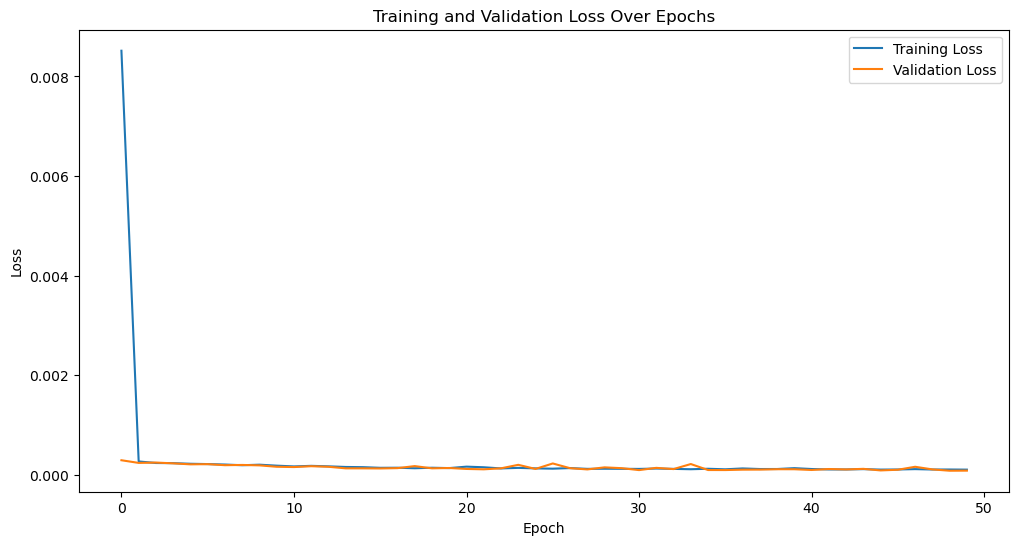

In [6]:
# Train LSTM model
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [7]:
# Predict on test set
y_val_pred = model.predict(X_test_seq)

# # Check shapes to debug the issue
# print(f'Shape of y_test_seq: {y_test_seq.shape}')
# print(f'Shape of y_val_pred: {y_val_pred.shape}')
# # Flatten y_val_pred and ensure it matches y_test_seq
# y_val_pred = y_val_pred.flatten()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [8]:
# Calculate metrics for validation set
test_mae = mean_absolute_error(y_test_seq, y_val_pred)
test_mse = mean_squared_error(y_test_seq, y_val_pred)
test_r2 = r2_score(y_test_seq, y_val_pred)
test_rmse = np.sqrt(test_mse)

print(f'Test Loss (MSE): {test_mse:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test R-squared: {test_r2:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Test Loss (MSE): 0.0001
Test MAE: 0.0042
Test R-squared: 0.9987
Test RMSE: 0.0087


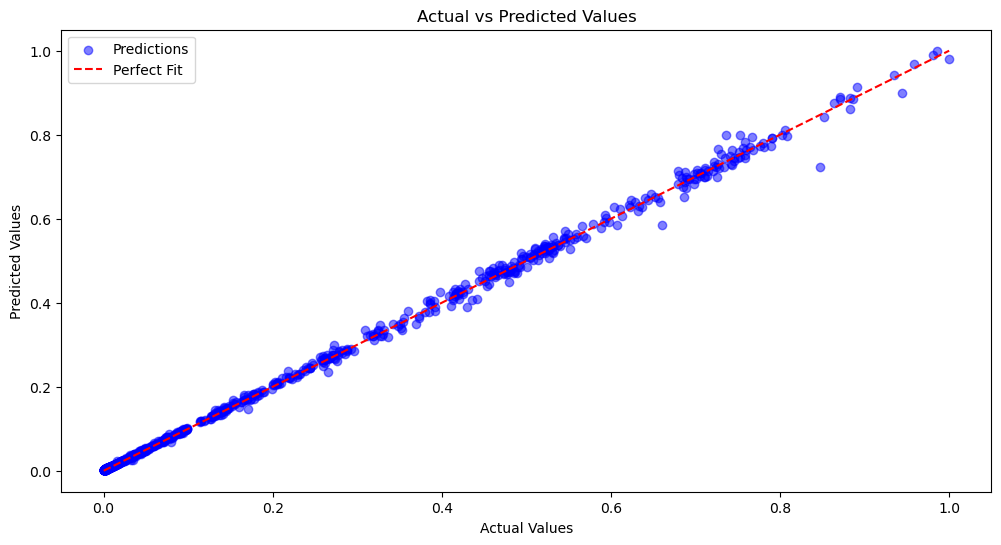

In [9]:
# Plot Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_seq, y_val_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([min(y_test_seq), max(y_test_seq)], [min(y_test_seq), max(y_test_seq)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()